1. Import library

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

2. Normalize data

In [106]:
cryptos = ['ADA', 'BTC', 'ETH']

for crypto in cryptos:
    data = pd.read_csv(f'../data/raw/{crypto}.csv')

    data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

    if data['Open'].dtype == object:
        data['Open'] = data['Open'].str.replace(',', '').astype(float)

    if data['High'].dtype == object:
        data['High'] = data['High'].str.replace(',', '').astype(float)

    if data['Low'].dtype == object:
        data['Low'] = data['Low'].str.replace(',', '').astype(float)
    
    if data['Close'].dtype == object: 
        data['Close'] = data['Close'].str.replace(',', '').astype(float)
    
    data.sort_values(by='Date', inplace=True)

    data.to_csv(f'../data/processed/{crypto}_processed.csv', index=False)
    

3. Visualize data

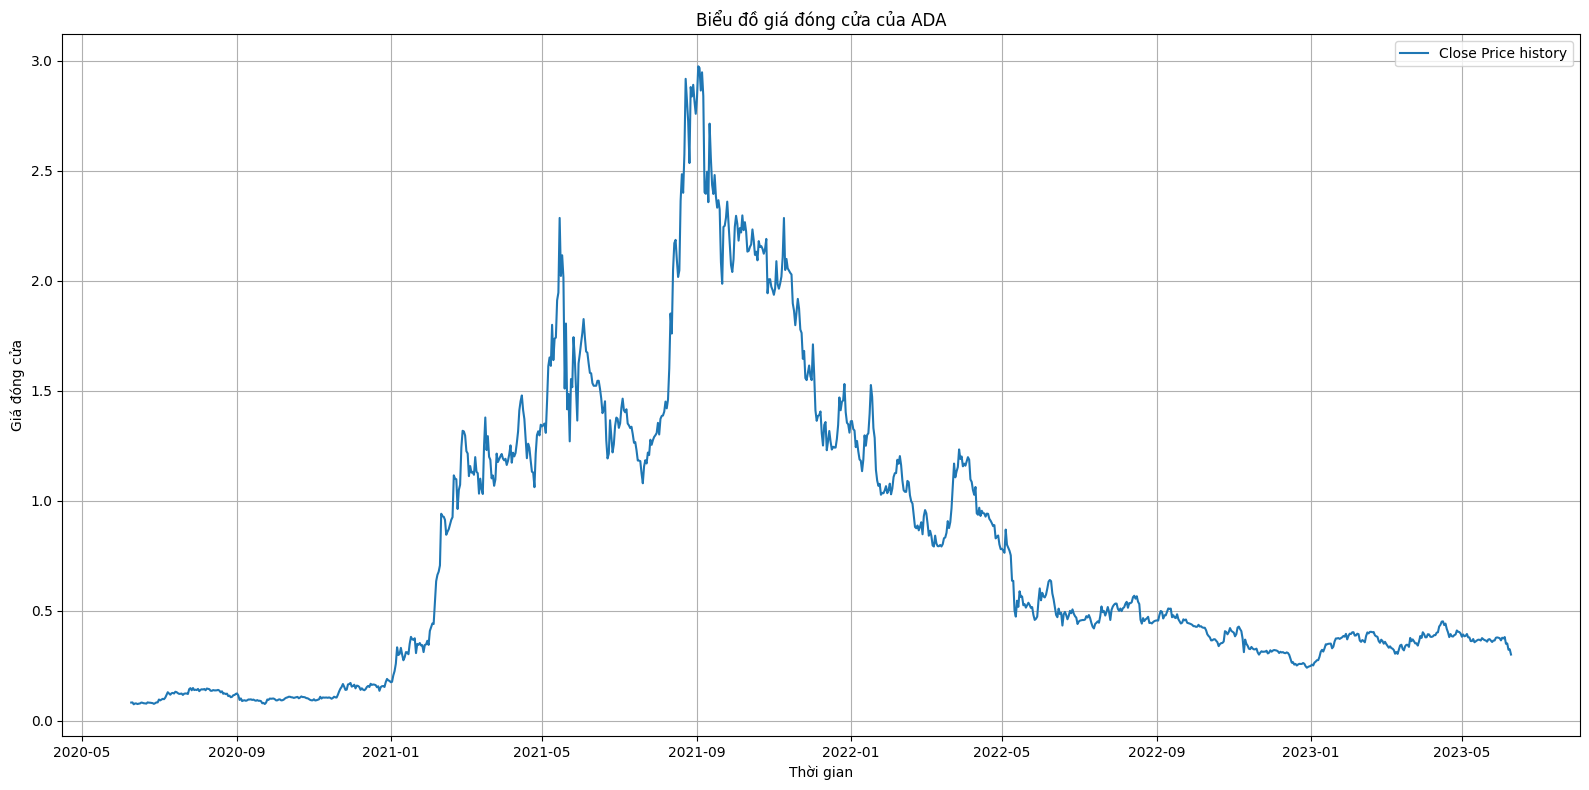

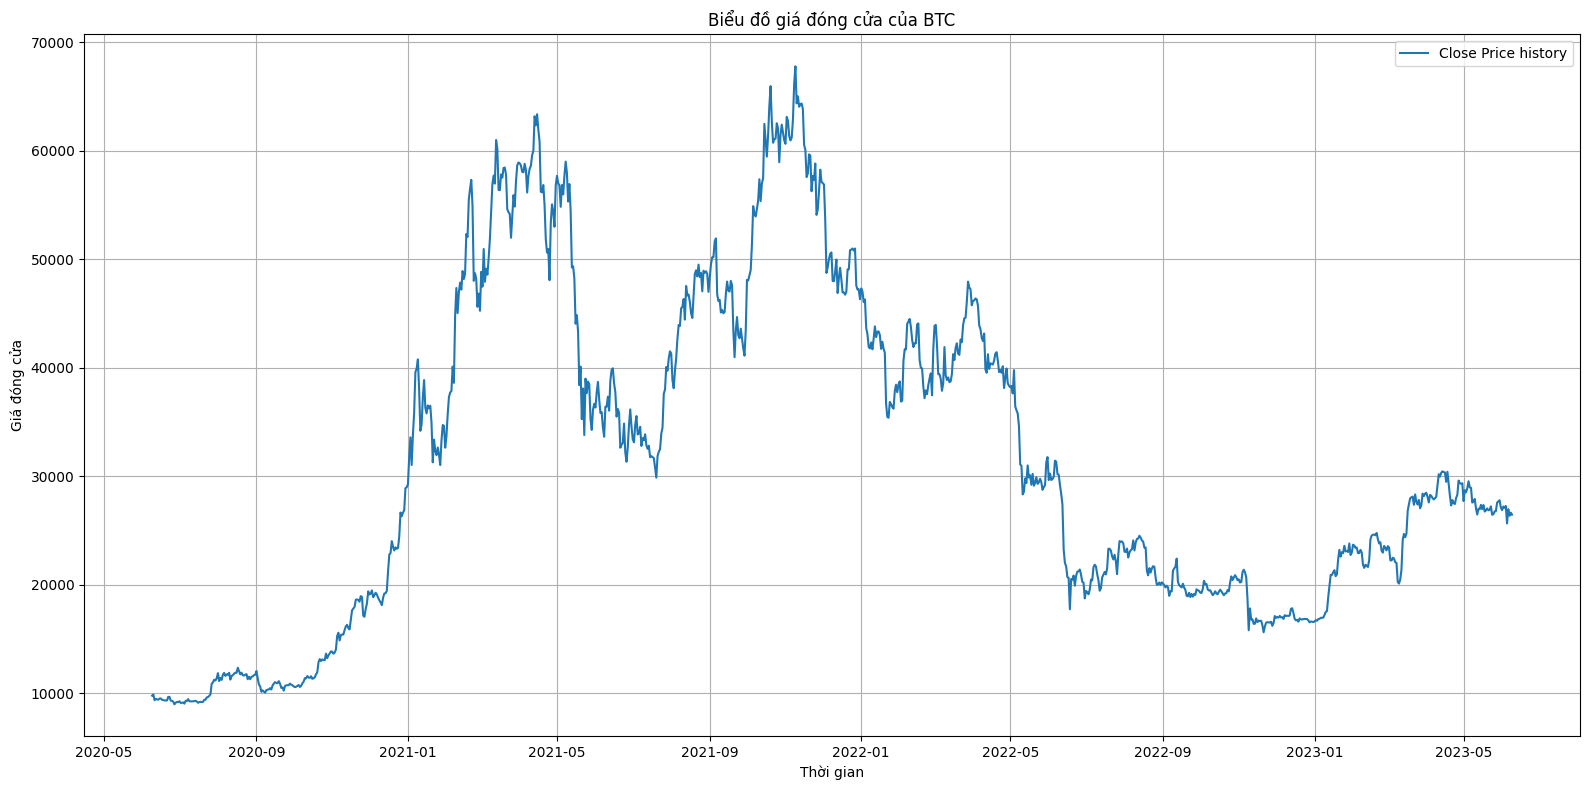

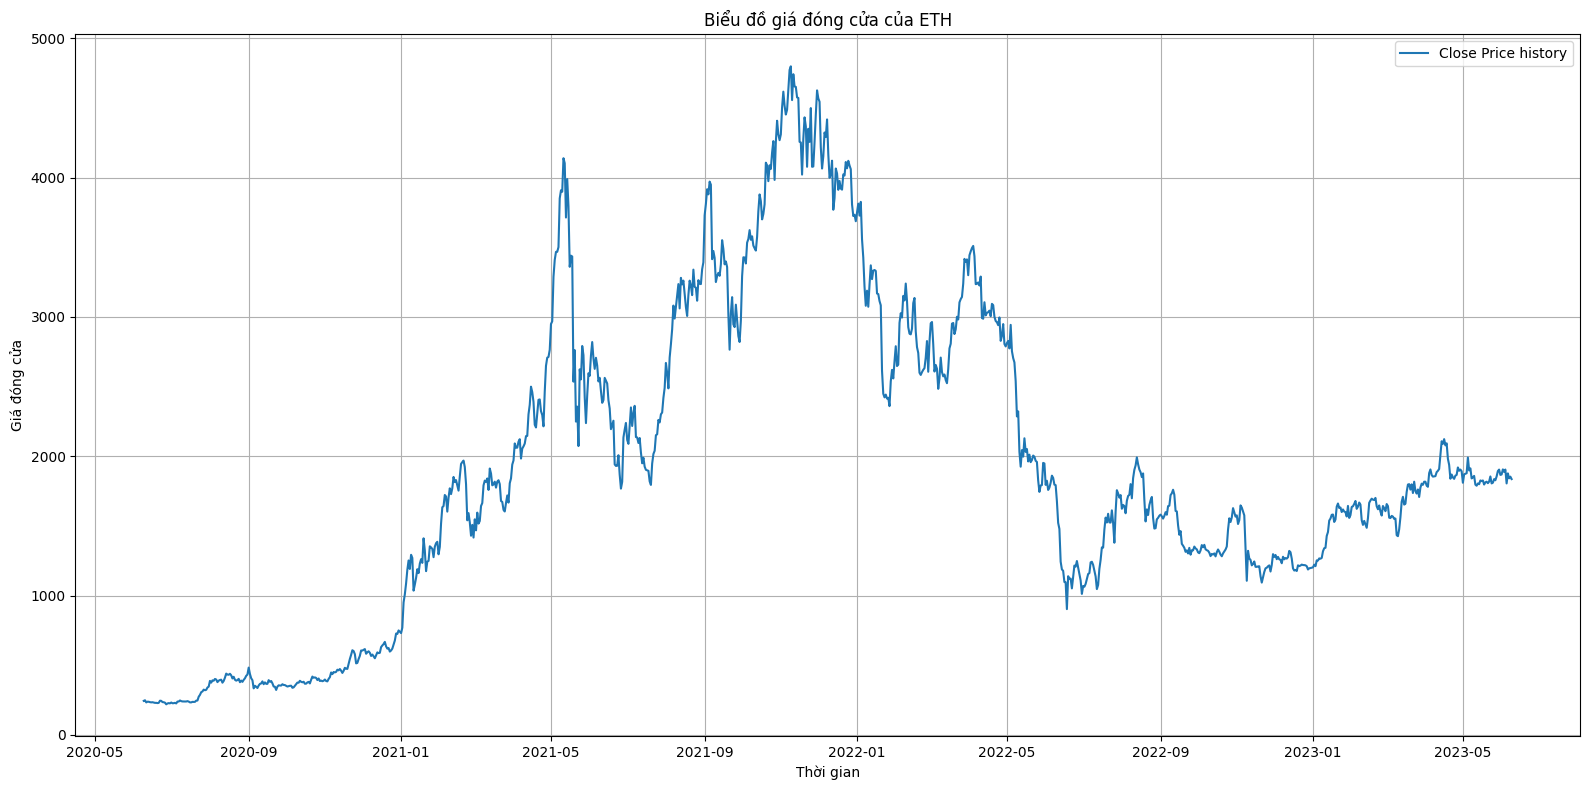

In [107]:
for crypto in cryptos:
    data = pd.read_csv(f'../data/processed/{crypto}_processed.csv')

    data = data[['Date', 'Close']]

    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

    data.set_index('Date', inplace=True)

    plt.figure(figsize=(16,8))
    plt.title(f'Biểu đồ giá đóng cửa của {crypto}')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá đóng cửa')
    plt.plot(data["Close"], label='Close Price history')

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()